# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## 1) Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [12,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Projection
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 dimensions (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a scatterplot with 3 subplots, one for every possible combination of the dataset's  dimensions. Each of these plots shows a different 2D __projection__ of the 3D dataset. 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 

In [2]:
gauss_fp = 'data/gauss_3d.csv'
gauss_data = np.genfromtxt(gauss_fp, delimiter=',')

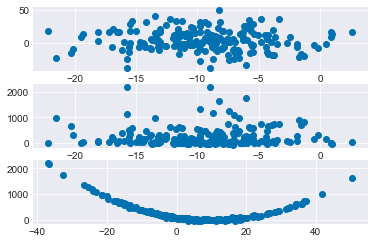

In [3]:
_, axes = plt.subplots(nrows=3, ncols=1)

_ = axes[0].scatter(gauss_data[:, 0], gauss_data[:, 1])
_ = axes[1].scatter(gauss_data[:, 0], gauss_data[:, 2])
_ = axes[2].scatter(gauss_data[:, 1], gauss_data[:, 2])

### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [4]:
gauss_data_homo = np.hstack((gauss_data, np.ones((1, gauss_data.shape[0])).T))

## 2) Scale

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the scaled results on all 3 possible pairs of axes alongside the original projections.

In [5]:
def scale_matrix(x=1, y=1, z=1):
    s = np.eye(4)
    s[0, 0] = x
    s[1, 1] = y
    s[2, 2] = z
    return s
        
scale_m = scale_matrix(x=3, z=0.1)

gauss_data_scaled = (scale_m @ gauss_data_homo.T).T

In [6]:
def plot_original_and_transposed(original, transposed):
    fig, axes = plt.subplots(nrows=1, ncols=3)

    axes[0].scatter(original[:, 0], original[:, 1])
    axes[0].scatter(transposed[:, 0], transposed[:, 1])
    axes[0].legend(['original', 'transposed'])
    axes[0].set_title('col 0 vs col 1')
    
    axes[1].scatter(original[:, 0], original[:, 2])
    axes[1].scatter(transposed[:, 0], transposed[:, 2])
    axes[1].legend(['original', 'transposed'])
    axes[1].set_title('col 0 vs col 2')
    
    axes[2].scatter(original[:, 1], original[:, 2])
    axes[2].scatter(transposed[:, 1], transposed[:, 2])
    axes[2].legend(['original', 'transposed'])
    axes[2].set_title('col 1 vs col 2')
    
    fig.subplots_adjust(hspace=1)

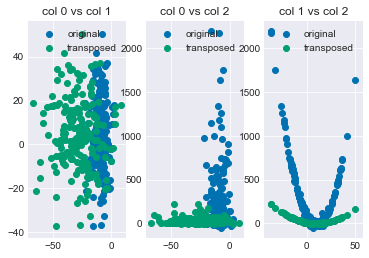

In [7]:
plot_original_and_transposed(gauss_data, gauss_data_scaled)

## 3) Translation

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the translated results on all 3 possible pairs of axes alongside the original projections. 
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend


In [8]:
def translate_matrix(x=0, y=0, z=0):
    
    t = np.eye(4)
    t[0, 3] = x
    t[1, 3] = y
    t[2, 3] = z
        
    return t 
    
translate_m = translate_matrix(y=25, z=-1000)

In [9]:
gauss_data_translated = (translate_m @ gauss_data_homo.T).T

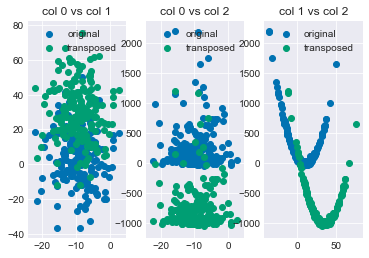

In [10]:
plot_original_and_transposed(gauss_data, gauss_data_translated)

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

## 4) Rotation

1. Design a transformation matrix that rotates the dataset
  - 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the rotated results on all 3 possible pairs of axes alongside the original projections.

In [15]:
def rotation_matrix(degree):
    import math
    degree = math.radians(degree)
    
    x_rot = np.eye(4)
    x_rot[1, 1] = np.cos(degree)
    x_rot[1, 2] = np.sin(degree)
    x_rot[2, 1] = -np.sin(degree)
    x_rot[2, 2] = np.cos(degree)
    
    y_rot = np.eye(4)
    y_rot[0, 0] = np.cos(degree)
    y_rot[0, 2] = np.sin(degree)
    y_rot[2, 0] = -np.sin(degree)
    y_rot[2, 2] = np.cos(degree)
    
    z_rot = np.eye(4)
    z_rot[0, 0] = np.cos(degree)
    z_rot[0, 1] = -np.sin(degree)
    z_rot[1, 0] = np.sin(degree)
    z_rot[1, 1] = np.cos(degree)
    
    return (x_rot, y_rot, z_rot)

In [16]:
_, rot, _ = rotation_matrix(30)
gauss_data_rotated = (rot @ gauss_data_homo.T).T

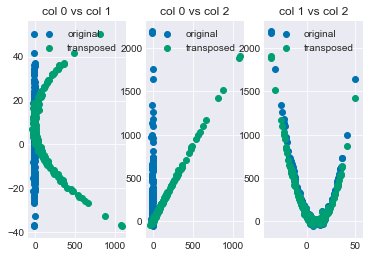

In [17]:
plot_original_and_transposed(gauss_data, gauss_data_rotated)

## 5) Putting it all together
1. Design a transformation matrix that applies all of the transformations in steps 2-4, simultaneously:
  - translates by +25 in Y and -1000 in Z
  - rotates by 30 degrees about Y
  - scales by 3 in X and 0.1 in Z
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. As 3 subplots, graph the scaled results on all 3 possible pairs of axes alongside the original projections.

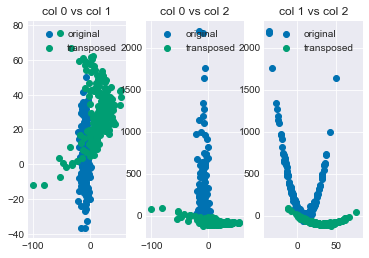

In [14]:
t = translate_matrix(y=25, z=-1000)
s = scale_matrix(x=3, z=0.1)
_, r, _ = rotation_matrix(30)

gauss_data_final = (r @ s @ t @ gauss_data_homo.T).T
plot_original_and_transposed(gauss_data, gauss_data_final)